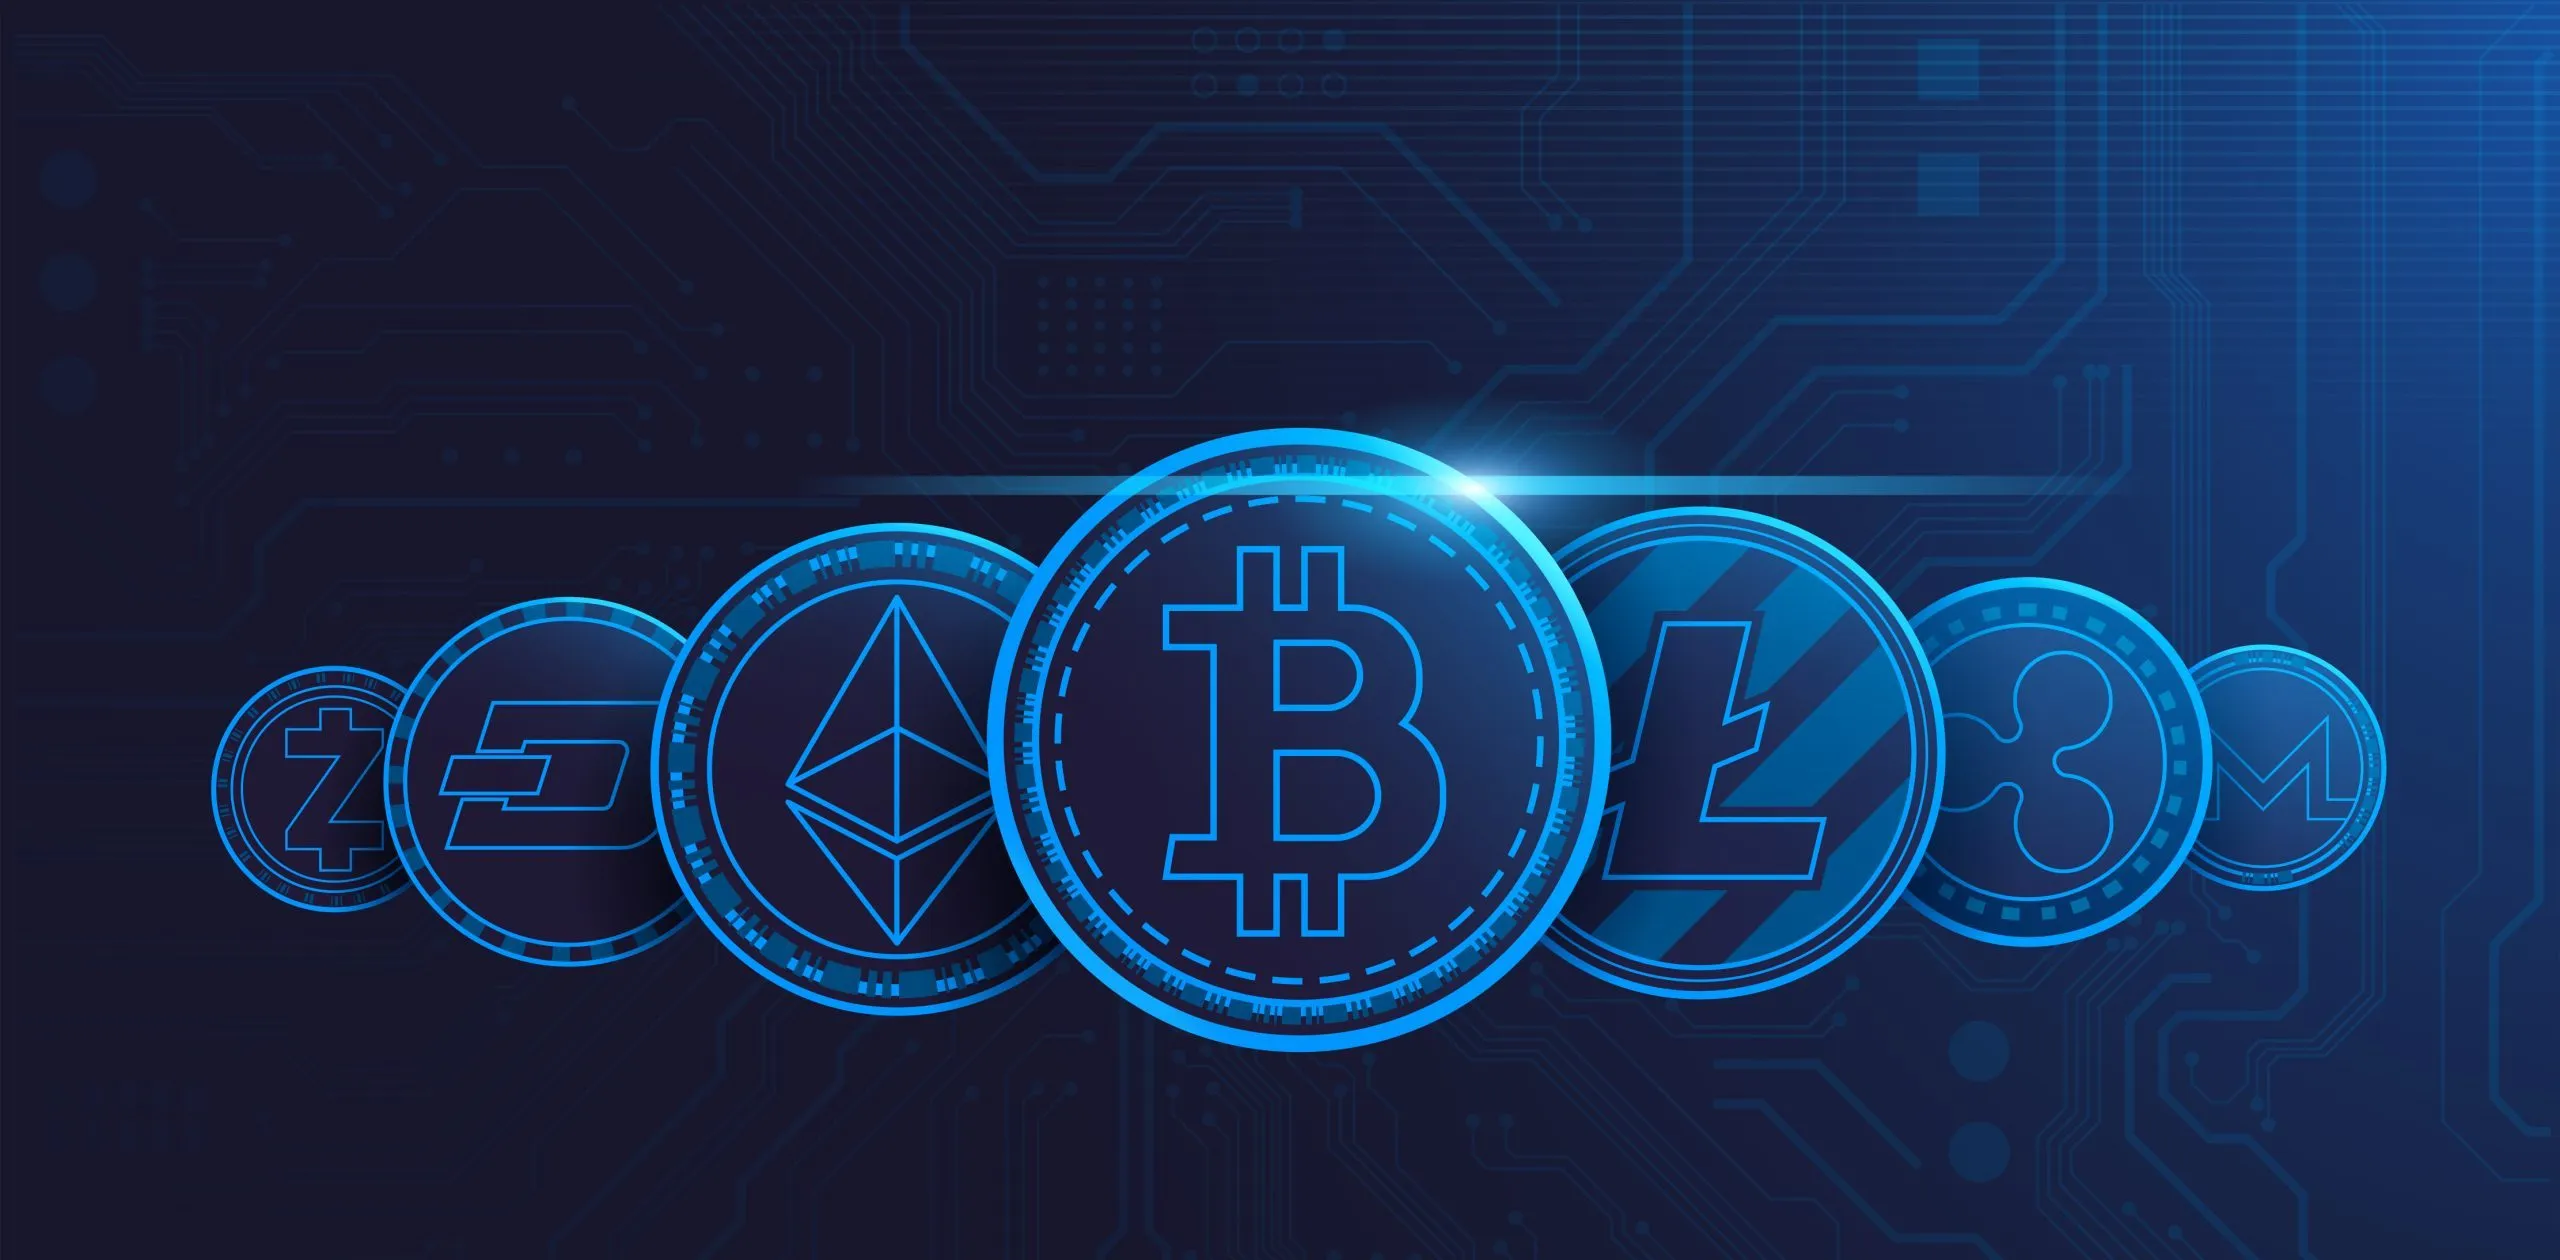

# **Project Title: Cryptocurrency Price Prediction**
## Group Number: 12
### Student Names and Registration Numbers:
- EG/2021/4408 - Arachchi N.A.N.N.N.
- EG/2021/4741 - Ranathunga O.K.



# **Introduction**
This project aims to predict the closing prices of Bitcoin, Ethereum, and Dogecoin using Linear Regression and Random Forest models. Due to the high volatility of cryptocurrency prices, accurate prediction is challenging and valuable for traders and investors.

By implementing and training Linear Regression and Random
Forest Regressor models, we will evaluate and compare their performance using metrics such as
Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). The goal is to identify
the model that provides the most accurate predictions for each cryptocurrency.

# **Literature Survey**

Cryptocurrency price prediction has gained significant attention in recent years due to the high volatility and potential profitability associated with cryptocurrencies. Several research studies and methodologies have been proposed to tackle the challenges of predicting cryptocurrency prices.

### Previous Work and Insights:
1. **Deep Learning Models for Cryptocurrency Price Prediction**  
   Recent research has demonstrated the effectiveness of deep learning models such as LSTM (Long Short-Term Memory) networks for capturing temporal dependencies in cryptocurrency prices. These models excel in identifying patterns in sequential data but are computationally expensive and require significant amounts of data for effective training.

2. **Traditional Machine Learning Models**  
   Studies have also explored traditional machine learning models, such as Linear Regression, Random Forest, and Support Vector Machines, for predicting cryptocurrency prices. These models are relatively easier to implement and interpret, but their performance may vary depending on the complexity of the dataset and the selected features.

3. **Feature Engineering and Data Preprocessing**  

   The importance of selecting relevant features, such as trading volume, market cap, and historical price data, has been highlighted in multiple studies. Effective data preprocessing, including normalization and handling missing values, is critical for improving model performance.

4. **Challenges in Cryptocurrency Prediction**  
   Cryptocurrency markets are influenced by various factors, including social sentiment, macroeconomic trends, and regulatory changes, making price prediction a challenging task. The highly volatile nature of cryptocurrencies often results in unpredictable price movements, necessitating robust and adaptable predictive models.

### Motivation for Current Study:  
The existing literature shows that while advanced models like LSTM and GRU are effective, simpler models like Linear Regression and Random Forest still hold promise for applications requiring interpretability and lower computational costs. By focusing on these models, our study aims to balance accuracy and computational efficiency, providing practical insights for traders and investors.

### Contribution of this Project:  
This project seeks to compare the predictive performance of Linear Regression and Random Forest models for Bitcoin, Ethereum, and Dogecoin. By systematically evaluating these models using standard metrics such as MAE, MSE, and R², we aim to identify the most effective approach for cryptocurrency price prediction using historical data.



   
# **Dataset Description**
The dataset contains historical price data for Bitcoin, Ethereum, and Dogecoin, including:

- Date        : Date of the recorded data.
- Open        : Price at the beginning of the day.
- High and Low: Highest and lowest prices during the day.
- Close       : Price at the end of the day (target variable for prediction).
- Volume      : Total trading volume for the day.
- Market Cap  : Total market value of the cryptocurrency.
- Currency    : Type of cryptocurrency (Bitcoin, Ethereum, Dogecoin).

The following links provide information about the algorithms we will use in this project for cryptocurrency price prediction:

- Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Additionally, the following dataset will be utilized for the project:

- Cryptocurrency Prices Dataset: https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [ ]:

# Load individual cryptocurrency CSV files

bitcoin_data = pd.read_csv('/content/drive/MyDrive/Project/BTC-USD (2014-2024).csv')
ethereum_data = pd.read_csv('/content/drive/MyDrive/Project/ETH-USD (2017-2024).csv')
dogecoin_data = pd.read_csv('/content/drive/MyDrive/Project/8 Dogecoin.csv')

In [ ]:
# Display the first few rows of each dataset
print("Bitcoin Dataset:\n", bitcoin_data.head())
print("\nEthereum Dataset:\n", ethereum_data.head())
print("\nDogecoin Dataset:\n", dogecoin_data.head())

Bitcoin Dataset:
          Date        Open        High         Low       Close   Adj Close  \
0  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
1  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
3  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
4  2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   

       Volume  
0  34483200.0  
1  37919700.0  
2  36863600.0  
3  26580100.0  
4  24127600.0  

Ethereum Dataset:
          Date        Open        High         Low       Close   Adj Close  \
0  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
1  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
3  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
4  2017-11-14  316

# Exploratory Data Analysis

In [ ]:
# Example: Showing dataset info for three datasets
print("Bitcoin Data Info:")
print(bitcoin_data.info())
print("\nEthereum Data Info:")
print(ethereum_data.info())
print("\nDogecoin Data Info:")
print(dogecoin_data.info())


Bitcoin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB
None

Ethereum Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2263 non-null   float64
 2   High       2263 non-null   float64
 3   Low        2263 non-null   float64
 4   Close      2263 non-null   float64
 5   Adj Close  2263 non-null   float64
 6   Volu

In [ ]:
# Convert 'Date' column to datetime for Bitcoin
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Convert 'Date' column to datetime for Ethereum
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Convert 'Date' column to datetime for Dogecoin
dogecoin_data['Date'] = pd.to_datetime(dogecoin_data['Date'])


In [ ]:
# Verify the conversion for Bitcoin dataset
print("Bitcoin Data Types:")
print(bitcoin_data.dtypes)

# Verify the conversion for Ethereum dataset
print("\nEthereum Data Types:")
print(ethereum_data.dtypes)

# Verify the conversion for Dogecoin dataset
print("\nDogecoin Data Types:")
print(dogecoin_data.dtypes)


Bitcoin Data Types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Ethereum Data Types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Dogecoin Data Types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


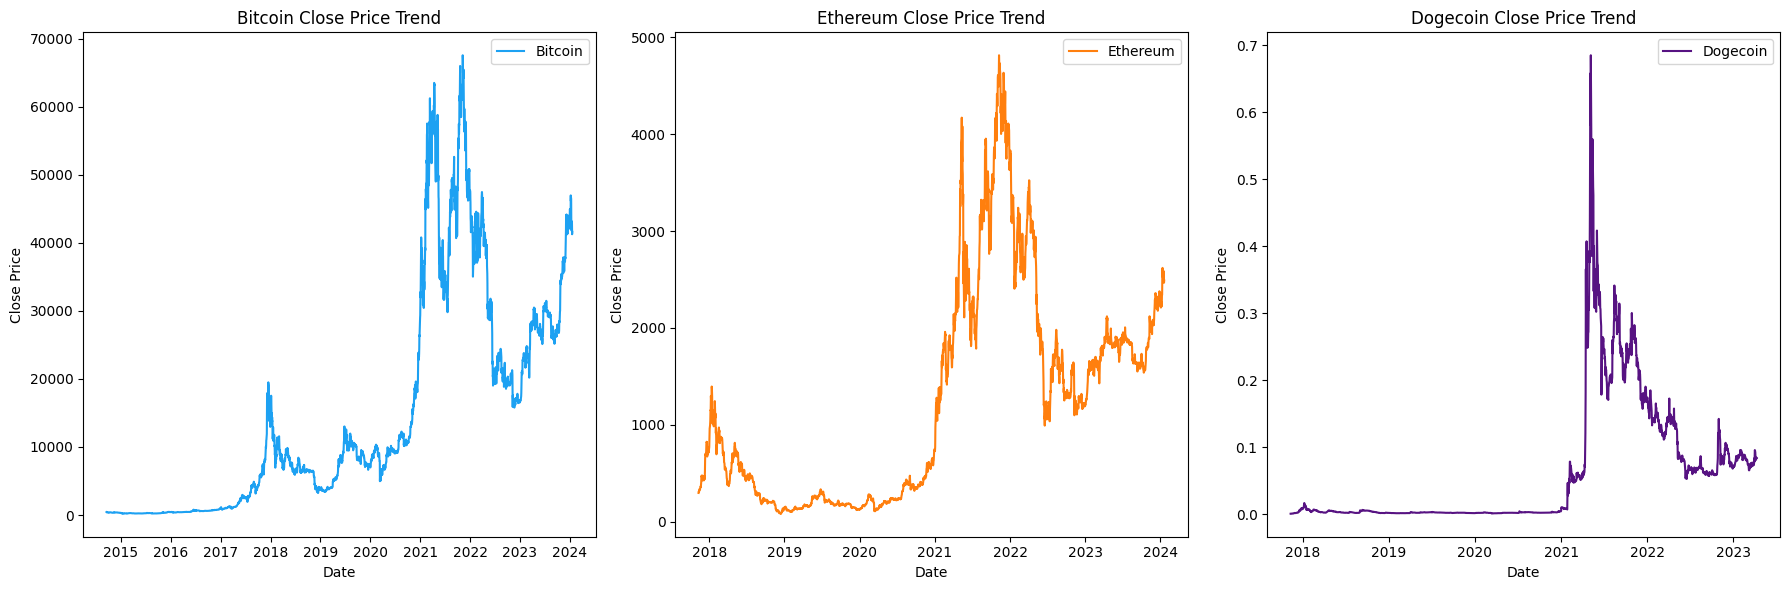

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with three subplots
plt.figure(figsize=(18, 6))

# Bitcoin
plt.subplot(1, 3, 1)
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label="Bitcoin", color='#1da1f2')  # Blue
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Bitcoin Close Price Trend")
plt.legend()

# Ethereum
plt.subplot(1, 3, 2)
plt.plot(ethereum_data['Date'], ethereum_data['Close'], label="Ethereum", color='#ff7f0e')  # Orange
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Ethereum Close Price Trend")
plt.legend()

#Dogecoin
plt.subplot(1, 3, 3)
plt.plot(dogecoin_data['Date'], dogecoin_data['Close'], label="Dogecoin", color='#571382')  # Purple
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Dogecoin Close Price Trend")
plt.legend()


plt.tight_layout()


plt.show()


**These graphs show the closing price trends of Bitcoin, Ethereum, and Dogecoin over time**

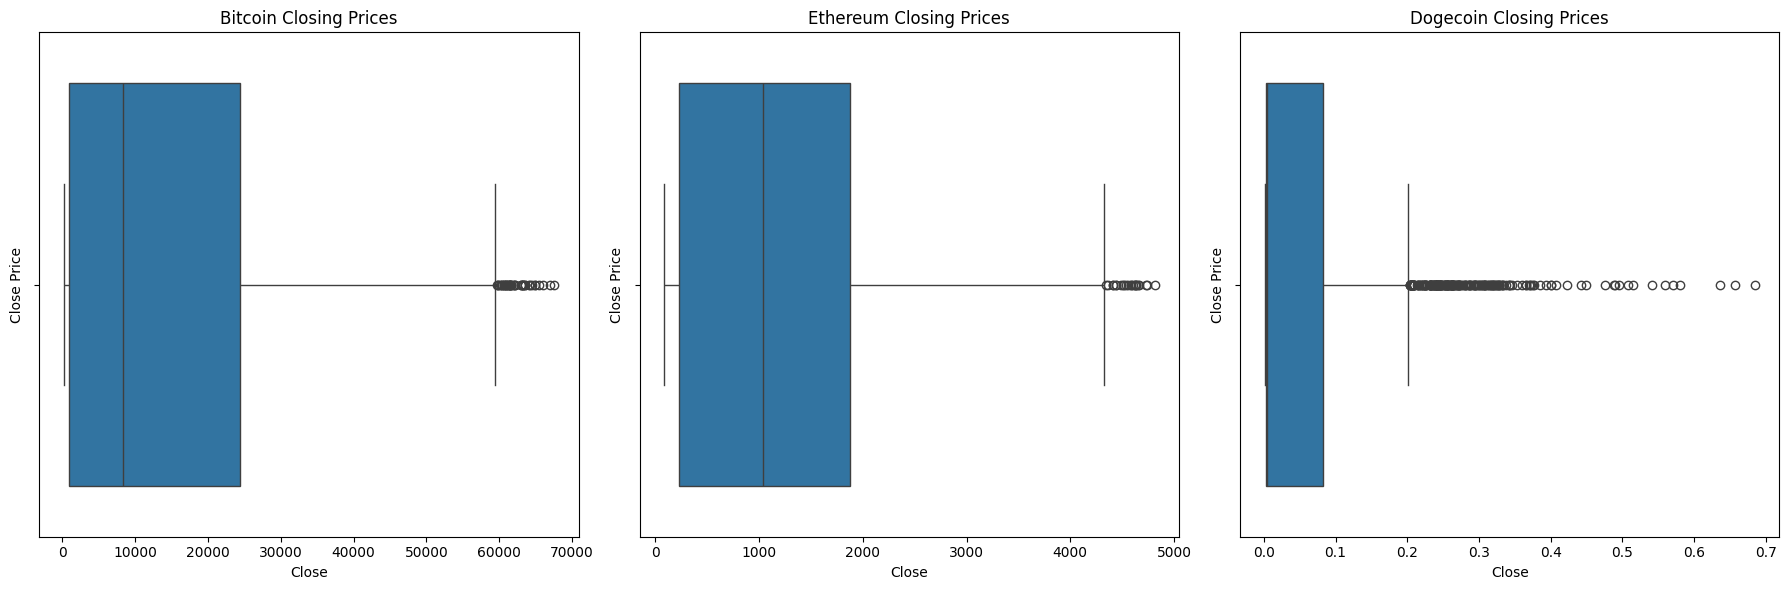

In [ ]:
# Create a single figure with three subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Box plot for Bitcoin closing prices
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.boxplot(x=bitcoin_data['Close'])
plt.title("Bitcoin Closing Prices")
plt.ylabel("Close Price")

# Subplot 2: Box plot for Ethereum closing prices
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.boxplot(x=ethereum_data['Close'])
plt.title("Ethereum Closing Prices")
plt.ylabel("Close Price")

# Subplot 3: Box plot for Dogecoin closing prices
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.boxplot(x=dogecoin_data['Close'])
plt.title("Dogecoin Closing Prices")
plt.ylabel("Close Price")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


**visualize the spread and volatility of the prices for each cryptocurrency**

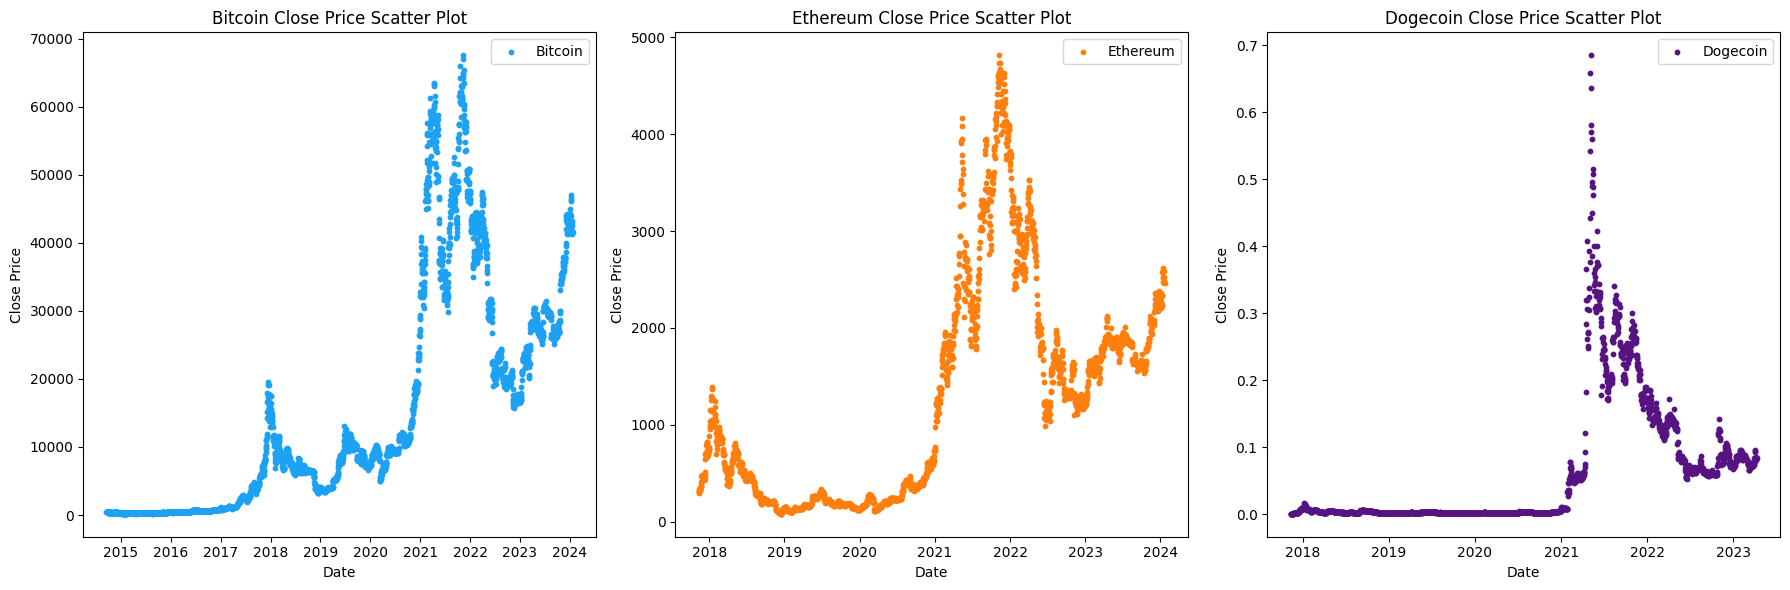

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with three subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Scatter plot for Bitcoin closing prices
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.scatter(bitcoin_data['Date'], bitcoin_data['Close'], color='#1da1f2', label="Bitcoin", s=10)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Bitcoin Close Price Scatter Plot")
plt.legend()

# Subplot 2: Scatter plot for Ethereum closing prices
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.scatter(ethereum_data['Date'], ethereum_data['Close'], color='#ff7f0e', label="Ethereum", s=10)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Ethereum Close Price Scatter Plot")
plt.legend()

# Subplot 3: Scatter plot for Dogecoin closing prices
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.scatter(dogecoin_data['Date'], dogecoin_data['Close'], color='#571382', label="Dogecoin", s=10)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Dogecoin Close Price Scatter Plot")
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


**The scatter plots give a clear view of how the prices of these cryptocurrencies have fluctuated over time, highlighting any trends, outliers or sudden price changes.**

#Data Preprocessing

### Feature Selection

In [ ]:
# Extract day, month, year in Date column

# For Bitcoin
bitcoin_data['Year'] = bitcoin_data['Date'].dt.year
bitcoin_data['Month'] = bitcoin_data['Date'].dt.month
bitcoin_data['Day'] = bitcoin_data['Date'].dt.day

# For Ethereum
ethereum_data['Year'] = ethereum_data['Date'].dt.year
ethereum_data['Month'] = ethereum_data['Date'].dt.month
ethereum_data['Day'] = ethereum_data['Date'].dt.day

# For Dogecoin
dogecoin_data['Year'] = dogecoin_data['Date'].dt.year
dogecoin_data['Month'] = dogecoin_data['Date'].dt.month
dogecoin_data['Day'] = dogecoin_data['Date'].dt.day


 Here we extract the year, month, and day from the "Date" column in each cryptocurrency's dataset

In [ ]:
# For Bitcoin
print("Bitcoin Data Info:")
print(bitcoin_data.info())

# For Ethereum
print("\nEthereum Data Info:")
print(ethereum_data.info())

# For Dogecoin
print("\nDogecoin Data Info:")
print(dogecoin_data.info())


Bitcoin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3413 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
 7   Year       3413 non-null   int32         
 8   Month      3413 non-null   int32         
 9   Day        3413 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 226.8 KB
None

Ethereum Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date   

###Spliting Data

In [ ]:
#Import the Necessary Libraries
from sklearn.model_selection import train_test_split


In [ ]:
# independent variables
X_bitcoin = bitcoin_data[['Open', 'High', 'Low', 'Volume']]
X_ethereum = ethereum_data[['Open', 'High', 'Low', 'Volume']]
X_dogecoin = dogecoin_data[['Open', 'High', 'Low', 'Volume']]

# dependent variable
y_bitcoin = bitcoin_data['Close']
y_ethereum = ethereum_data['Close']
y_dogecoin = dogecoin_data['Close']

In [ ]:
# Split the data into training and testing sets for Bitcoin
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(
    X_bitcoin, y_bitcoin, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Ethereum
X_train_ethereum, X_test_ethereum, y_train_ethereum, y_test_ethereum = train_test_split(
    X_ethereum, y_ethereum, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Dogecoin
X_train_dogecoin, X_test_dogecoin, y_train_dogecoin, y_test_dogecoin = train_test_split(
    X_dogecoin, y_dogecoin, test_size=0.2, random_state=42)

Here We allocated 80% of the data for training and 20% for testing to ensure the model is properly trained without overfitting.

In [ ]:
# For Bitcoin dataset
print(f"Training set size (Bitcoin): {X_train_bitcoin.shape[0]} samples")
print(f"Testing set size (Bitcoin): {X_test_bitcoin.shape[0]} samples")

# For Ethereum dataset
print(f"Training set size (Ethereum): {X_train_ethereum.shape[0]} samples")
print(f"Testing set size (Ethereum): {X_test_ethereum.shape[0]} samples")

# For Dogecoin dataset
print(f"Training set size (Dogecoin): {X_train_dogecoin.shape[0]} samples")
print(f"Testing set size (Dogecoin): {X_test_dogecoin.shape[0]} samples")


Training set size (Bitcoin): 2730 samples
Testing set size (Bitcoin): 683 samples
Training set size (Ethereum): 1811 samples
Testing set size (Ethereum): 453 samples
Training set size (Dogecoin): 1583 samples
Testing set size (Dogecoin): 396 samples


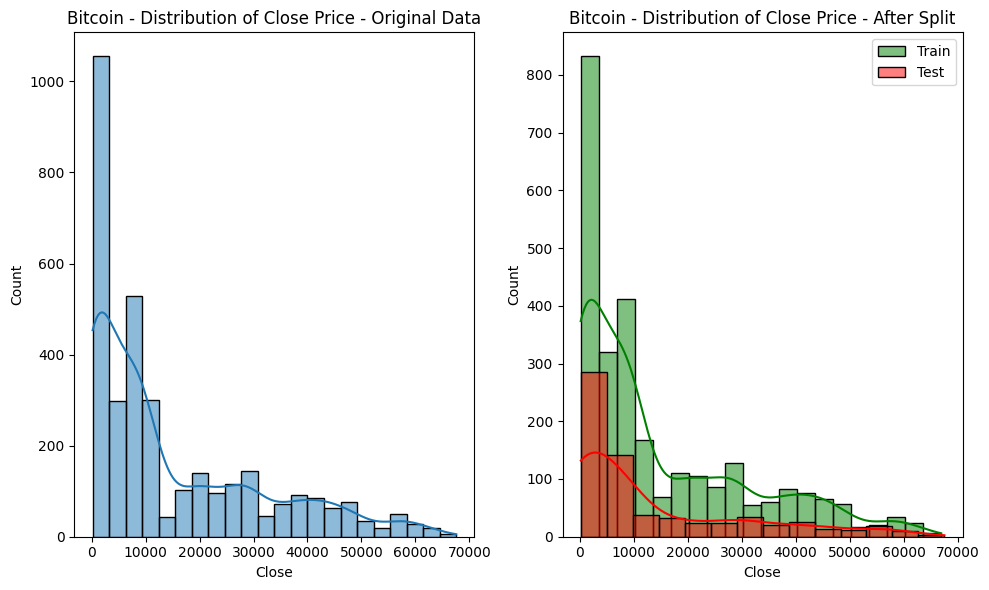

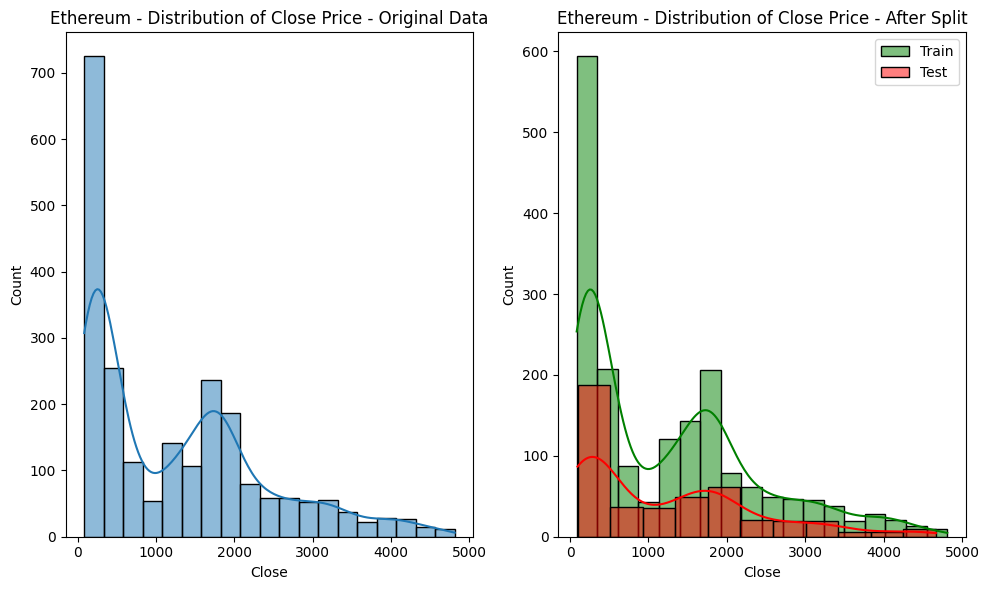

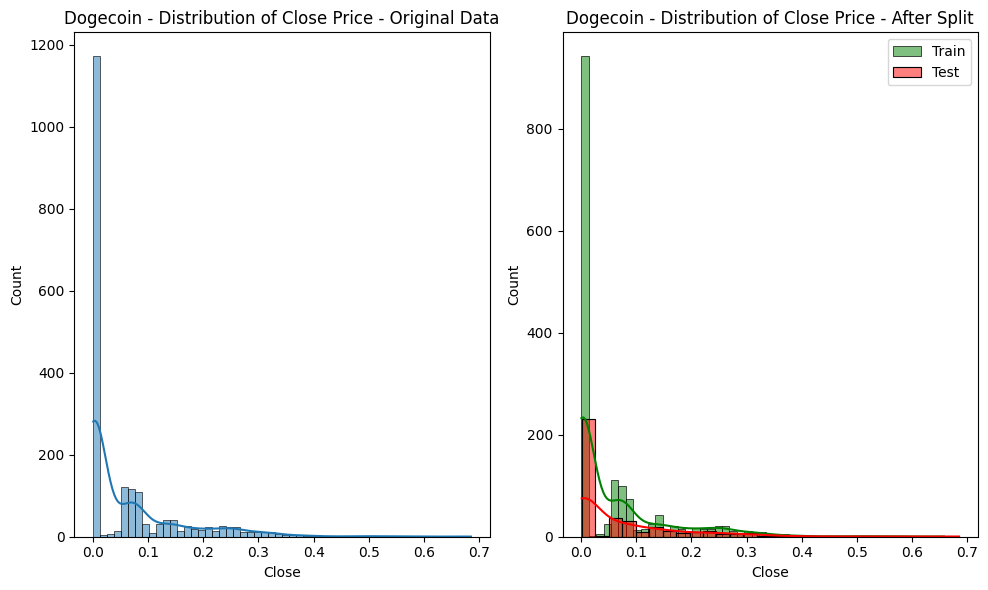

In [ ]:
# Visualize the distribution of the target variable before and after the split for Bitcoin
plt.figure(figsize=(10, 6))

# Before split (Original Data)
plt.subplot(1, 2, 1)
sns.histplot(y_bitcoin, kde=True)
plt.title('Bitcoin - Distribution of Close Price - Original Data')

# After split (Training and Testing Data)
plt.subplot(1, 2, 2)
sns.histplot(y_train_bitcoin, kde=True, color='green', label='Train')
sns.histplot(y_test_bitcoin, kde=True, color='red', label='Test')
plt.title('Bitcoin - Distribution of Close Price - After Split')
plt.legend()

plt.tight_layout()
plt.show()


# Visualize the distribution of the target variable before and after the split for Ethereum
plt.figure(figsize=(10, 6))

# Before split (Original Data)
plt.subplot(1, 2, 1)
sns.histplot(y_ethereum, kde=True)
plt.title('Ethereum - Distribution of Close Price - Original Data')

# After split (Training and Testing Data)
plt.subplot(1, 2, 2)
sns.histplot(y_train_ethereum, kde=True, color='green', label='Train')
sns.histplot(y_test_ethereum, kde=True, color='red', label='Test')
plt.title('Ethereum - Distribution of Close Price - After Split')
plt.legend()

plt.tight_layout()
plt.show()


# Visualize the distribution of the target variable before and after the split for Dogecoin
plt.figure(figsize=(10, 6))

# Before split (Original Data)
plt.subplot(1, 2, 1)
sns.histplot(y_dogecoin, kde=True)
plt.title('Dogecoin - Distribution of Close Price - Original Data')

# After split (Training and Testing Data)
plt.subplot(1, 2, 2)
sns.histplot(y_train_dogecoin, kde=True, color='green', label='Train')
sns.histplot(y_test_dogecoin, kde=True, color='red', label='Test')
plt.title('Dogecoin - Distribution of Close Price - After Split')
plt.legend()

plt.tight_layout()
plt.show()


the distribution of the target variable before and after the split

###Handling Missing Values

In [ ]:
# For Bitcoin training and testing data

print("Bitcoin Data Missing Values:")
print("Missing values in training features")
print(X_train_bitcoin.isnull().sum())
print("\nMissing values in training target ")
print(y_train_bitcoin.isnull().sum())
print("\nMissing values in testing features ")
print(X_test_bitcoin.isnull().sum())
print("\nMissing values in testing target ")
print(y_test_bitcoin.isnull().sum())

# For Ethereum training and testing data
print("\nEthereum Data Missing Values:")
print("nMissing values in training features")
print(X_train_ethereum.isnull().sum())
print("\nMissing values in training target ")
print(y_train_ethereum.isnull().sum())
print("\nMissing values in testing features ")
print(X_test_ethereum.isnull().sum())
print("\nMissing values in testing target ")
print(y_test_ethereum.isnull().sum())

# For Dogecoin training and testing data
print("\nDogecoin Data Missing Values:")
print("Missing values in training features")
print(X_train_dogecoin.isnull().sum())
print("\nMissing values in training target ")
print(y_train_dogecoin.isnull().sum())
print("\nMissing values in testing features ")
print(X_test_dogecoin.isnull().sum())
print("\nMissing values in testing target ")
print(y_test_dogecoin.isnull().sum())


Bitcoin Data Missing Values:
Missing values in training features
Open      0
High      0
Low       0
Volume    0
dtype: int64

Missing values in training target 
0

Missing values in testing features 
Open      1
High      1
Low       1
Volume    1
dtype: int64

Missing values in testing target 
1

Ethereum Data Missing Values:
nMissing values in training features
Open      0
High      0
Low       0
Volume    0
dtype: int64

Missing values in training target 
0

Missing values in testing features 
Open      1
High      1
Low       1
Volume    1
dtype: int64

Missing values in testing target 
1

Dogecoin Data Missing Values:
Missing values in training features
Open      0
High      0
Low       0
Volume    0
dtype: int64

Missing values in training target 
0

Missing values in testing features 
Open      0
High      0
Low       0
Volume    0
dtype: int64

Missing values in testing target 
0


Here, Drop Missing Values

In [ ]:
# For Bitcoin testing data
X_test_bitcoin = X_test_bitcoin.dropna()
y_test_bitcoin = y_test_bitcoin.dropna()

# For Ethereum testing data
X_test_ethereum = X_test_ethereum.dropna()
y_test_ethereum = y_test_ethereum.dropna()

# For dogecoin testing data
X_test_dogecoin = X_test_dogecoin.dropna()
y_test_dogecoin = y_test_dogecoin.dropna()

# For Bitcoin training data
X_train_bitcoin = X_train_bitcoin.dropna()
y_train_bitcoin = y_train_bitcoin.dropna()

# For Ethereum training data
X_train_ethereum = X_train_ethereum.dropna()
y_train_ethereum = y_train_ethereum.dropna()

# For Dogecoin training data
X_train_dogecoin = X_train_dogecoin.dropna()
y_train_dogecoin = y_train_dogecoin.dropna()

In [ ]:
# Verify no missing values in testing data
print("Bitcoin Testing Data After Dropping Missing Values:")
print(X_test_bitcoin.isnull().sum(), y_test_bitcoin.isnull().sum())
print("\nEthereum Testing Data After Dropping Missing Values:")
print(X_test_ethereum.isnull().sum(), y_test_ethereum.isnull().sum())
print("\nDogecoin Testing Data After Dropping Missing Values:")
print(X_test_dogecoin.isnull().sum(), y_test_dogecoin.isnull().sum())

# Verify no missing values in training data
print("\nBitcoin Training Data After Dropping Missing Values:")
print(X_train_bitcoin.isnull().sum(), y_train_bitcoin.isnull().sum())
print("\nEthereum Training Data After Dropping Missing Values:")
print(X_train_ethereum.isnull().sum(), y_train_ethereum.isnull().sum())
print("\nDogecoin Training Data After Dropping Missing Values:")
print(X_train_dogecoin.isnull().sum(), y_train_dogecoin.isnull().sum())


Bitcoin Testing Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0

Ethereum Testing Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0

Dogecoin Testing Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0

Bitcoin Training Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0

Ethereum Training Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0

Dogecoin Training Data After Dropping Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64 0


* We removed rows with missing values from both training and testing datasets for Bitcoin, Ethereum, and Dogecoin to ensure clean and reliable data. This process ensured all datasets were free of missing values and ready for model training.

In [ ]:
# For Bitcoin dataset
print(f"Training set size (Bitcoin): {X_train_bitcoin.shape[0]} samples")
print(f"Testing set size (Bitcoin): {X_test_bitcoin.shape[0]} samples")

# For Ethereum dataset
print(f"Training set size (Ethereum): {X_train_ethereum.shape[0]} samples")
print(f"Testing set size (Ethereum): {X_test_ethereum.shape[0]} samples")

# For Dogecoin dataset
print(f"Training set size (Dogecoin): {X_train_dogecoin.shape[0]} samples")
print(f"Testing set size (Dogecoin): {X_test_dogecoin.shape[0]} samples")


Training set size (Bitcoin): 2730 samples
Testing set size (Bitcoin): 682 samples
Training set size (Ethereum): 1811 samples
Testing set size (Ethereum): 452 samples
Training set size (Dogecoin): 1583 samples
Testing set size (Dogecoin): 396 samples


### Handle Outliers

In [ ]:
# Function to remove outliers based on a quantile threshold
def remove_outliers(data, target_column, quantile=0.95):
    threshold = data[target_column].quantile(quantile)
    return data[data[target_column] < threshold]

# Function to remove outliers from features and target
def remove_outliers_from_features_and_target(features, target, quantile=0.95):
    data = features.copy()
    data['Close'] = target
    data_clean = remove_outliers(data, 'Close', quantile)
    features_clean = data_clean.drop(columns=['Close'])
    target_clean = data_clean['Close']
    return features_clean, target_clean

# For Bitcoin
X_train_bitcoin, y_train_bitcoin = remove_outliers_from_features_and_target(X_train_bitcoin, y_train_bitcoin)
X_test_bitcoin, y_test_bitcoin = remove_outliers_from_features_and_target(X_test_bitcoin, y_test_bitcoin)

# For Ethereum
X_train_ethereum, y_train_ethereum = remove_outliers_from_features_and_target(X_train_ethereum, y_train_ethereum)
X_test_ethereum, y_test_ethereum = remove_outliers_from_features_and_target(X_test_ethereum, y_test_ethereum)

# For Dogecoin
X_train_dogecoin, y_train_dogecoin = remove_outliers_from_features_and_target(X_train_dogecoin, y_train_dogecoin)
X_test_dogecoin, y_test_dogecoin = remove_outliers_from_features_and_target(X_test_dogecoin, y_test_dogecoin)


**Now sample sizes**

In [ ]:
# For Bitcoin dataset
print(f"Training set size (Bitcoin): {X_train_bitcoin.shape[0]} samples")
print(f"Testing set size (Bitcoin): {X_test_bitcoin.shape[0]} samples")

# For Ethereum dataset
print(f"Training set size (Ethereum): {X_train_ethereum.shape[0]} samples")
print(f"Testing set size (Ethereum): {X_test_ethereum.shape[0]} samples")

# For Dogecoin dataset
print(f"Training set size (Dogecoin): {X_train_dogecoin.shape[0]} samples")
print(f"Testing set size (Dogecoin): {X_test_dogecoin.shape[0]} samples")


Training set size (Bitcoin): 2593 samples
Testing set size (Bitcoin): 647 samples
Training set size (Ethereum): 1720 samples
Testing set size (Ethereum): 429 samples
Training set size (Dogecoin): 1503 samples
Testing set size (Dogecoin): 376 samples


### Handling duplicates


In [ ]:
import pandas as pd

# Convert numpy arrays to DataFrame (if they are numpy arrays)
X_train_bitcoin = pd.DataFrame(X_train_bitcoin)
X_train_ethereum = pd.DataFrame(X_train_ethereum)
X_train_dogecoin = pd.DataFrame(X_train_dogecoin)

# Check for duplicates in the entire dataframe
duplicates_bitcoin = X_train_bitcoin.duplicated()
duplicates_ethereum = X_train_ethereum.duplicated()
duplicates_dogecoin = X_train_dogecoin.duplicated()

# Print the count of duplicate rows
print(f"Bitcoin duplicates count: {duplicates_bitcoin.sum()}")
print(f"Ethereum duplicates count: {duplicates_ethereum.sum()}")
print(f"Dogecoin duplicates count: {duplicates_dogecoin.sum()}")


Bitcoin duplicates count: 0
Ethereum duplicates count: 0
Dogecoin duplicates count: 0


**No duplicates were found in any of the datasets (Bitcoin, Ethereum, Dogecoin), so no further action is required.**

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Bitcoin
X_train_bitcoin_scaled = scaler.fit_transform(X_train_bitcoin)
X_test_bitcoin_scaled = scaler.transform(X_test_bitcoin)

#Ethereum
X_train_ethereum_scaled = scaler.fit_transform(X_train_ethereum)
X_test_ethereum_scaled = scaler.transform(X_test_ethereum)

#Dogecoin
X_train_dogecoin_scaled = scaler.fit_transform(X_train_dogecoin)
X_test_dogecoin_scaled = scaler.transform(X_test_dogecoin)

# Verify the scaling by printing the first few rows of the scaled training data
print("Scaled Bitcoin Training Data (First 5 rows):")
print(X_train_bitcoin_scaled[:5])

print("\nScaled Ethereum Training Data (First 5 rows):")
print(X_train_ethereum_scaled[:5])

print("\nScaled Dogecoin Training Data (First 5 rows):")
print(X_train_dogecoin_scaled[:5])


Scaled Bitcoin Training Data (First 5 rows):
[[-0.43312806 -0.44476    -0.44337332  1.28910467]
 [ 0.52798418  0.49970699  0.516934    0.57904792]
 [-0.08225434 -0.09787361 -0.06882667  0.38368296]
 [-0.19184978 -0.17767244 -0.17445653  0.80937049]
 [ 1.55406472  1.57330056  1.58769651  0.4999848 ]]

Scaled Ethereum Training Data (First 5 rows):
[[-0.91035008 -0.91432566 -0.91809306 -0.981228  ]
 [ 0.49645991  0.46066043  0.53089442 -0.63052803]
 [ 0.50650387  0.47700809  0.53569305 -0.4114629 ]
 [-1.0377004  -1.03972972 -1.03770448 -0.90638866]
 [-0.98510257 -0.99101762 -1.01279828 -0.89860385]]

Scaled Dogecoin Training Data (First 5 rows):
[[-0.62484229 -0.62694123 -0.62659512 -0.38761558]
 [-0.63891537 -0.63916381 -0.64046148 -0.20250999]
 [-0.63238463 -0.63414357 -0.63445636 -0.37767221]
 [-0.59346797 -0.59596404 -0.59307563 -0.38188144]
 [ 2.26541885  2.18781825  2.14020489  0.2999261 ]]


# Train and Evaluate

## Model 1 -Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the Linear Regression model
model_bitcoin = LinearRegression()
model_ethereum = LinearRegression()
model_dogecoin = LinearRegression()

# Fit the model to the scaled training data
model_bitcoin.fit(X_train_bitcoin_scaled, y_train_bitcoin)
model_ethereum.fit(X_train_ethereum_scaled, y_train_ethereum)
model_dogecoin.fit(X_train_dogecoin_scaled, y_train_dogecoin)

# Predict on training and test data
y_train_pred_bitcoin = model_bitcoin.predict(X_train_bitcoin_scaled)
y_test_pred_bitcoin = model_bitcoin.predict(X_test_bitcoin_scaled)

y_train_pred_ethereum = model_ethereum.predict(X_train_ethereum_scaled)
y_test_pred_ethereum = model_ethereum.predict(X_test_ethereum_scaled)

y_train_pred_dogecoin = model_dogecoin.predict(X_train_dogecoin_scaled)
y_test_pred_dogecoin = model_dogecoin.predict(X_test_dogecoin_scaled)


In [ ]:
# Evaluate performance for Bitcoin model
mse_bitcoin = mean_squared_error(y_test_bitcoin, y_test_pred_bitcoin)
r2_bitcoin = r2_score(y_test_bitcoin, y_test_pred_bitcoin)

# Evaluate performance for Ethereum model
mse_ethereum = mean_squared_error(y_test_ethereum, y_test_pred_ethereum)
r2_ethereum = r2_score(y_test_ethereum, y_test_pred_ethereum)

# Evaluate performance for Dogecoin model
mse_dogecoin = mean_squared_error(y_test_dogecoin, y_test_pred_dogecoin)
r2_dogecoin = r2_score(y_test_dogecoin, y_test_pred_dogecoin)

# Print the evaluation metrics
print("Bitcoin Model Evaluation:")
print(f"Mean Squared Error: {mse_bitcoin}")
print(f"R-squared: {r2_bitcoin}\n")

print("Ethereum Model Evaluation:")
print(f"Mean Squared Error: {mse_ethereum}")
print(f"R-squared: {r2_ethereum}\n")

print("Dogecoin Model Evaluation:")
print(f"Mean Squared Error: {mse_dogecoin}")
print(f"R-squared: {r2_dogecoin}")


Bitcoin Model Evaluation:
Mean Squared Error: 58494.636403415716
R-squared: 0.9996795283805979

Ethereum Model Evaluation:
Mean Squared Error: 607.8982539791654
R-squared: 0.9992878514122134

Dogecoin Model Evaluation:
Mean Squared Error: 3.4577373726002905e-06
R-squared: 0.9993232274467733


### Calculate R²,MAE, MSE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Calculate R²
from sklearn.metrics import r2_score

r2_train_bitcoin = r2_score(y_train_bitcoin, y_train_pred_bitcoin)
r2_test_bitcoin = r2_score(y_test_bitcoin, y_test_pred_bitcoin)

r2_train_ethereum = r2_score(y_train_ethereum, y_train_pred_ethereum)
r2_test_ethereum = r2_score(y_test_ethereum, y_test_pred_ethereum)

r2_train_dogecoin = r2_score(y_train_dogecoin, y_train_pred_dogecoin)
r2_test_dogecoin = r2_score(y_test_dogecoin, y_test_pred_dogecoin)

# Print the results

print("Bitcoin:")
print(f"R-squared (R²) -Training Set: {r2_train_bitcoin:.4f}")
print(f"R-squared (R²) - Test Set: {r2_test_bitcoin:.4f}")

print("\nEthereum:")
print(f"R^2 Value - Training Set: {r2_train_ethereum:.4f}")
print(f"R^2 Value - Test Set: {r2_test_ethereum:.4f}")

print("\nDogecoin:")
print(f"R^2 Value - Training Set: {r2_train_dogecoin:.4f}")
print(f"R^2 Value - Test Set: {r2_test_dogecoin:.4f}")



Bitcoin:
R-squared (R²) -Training Set: 0.9996
R-squared (R²) - Test Set: 0.9997

Ethereum:
R^2 Value - Training Set: 0.9993
R^2 Value - Test Set: 0.9993

Dogecoin:
R^2 Value - Training Set: 0.9985
R^2 Value - Test Set: 0.9993


In [ ]:
# Calculate MAE
from sklearn.metrics import mean_absolute_error

mae_train_bitcoin = mean_absolute_error(y_train_bitcoin, y_train_pred_bitcoin)
mae_test_bitcoin = mean_absolute_error(y_test_bitcoin, y_test_pred_bitcoin)

mae_train_ethereum = mean_absolute_error(y_train_ethereum, y_train_pred_ethereum)
mae_test_ethereum = mean_absolute_error(y_test_ethereum, y_test_pred_ethereum)

mae_train_dogecoin = mean_absolute_error(y_train_dogecoin, y_train_pred_dogecoin)
mae_test_dogecoin = mean_absolute_error(y_test_dogecoin, y_test_pred_dogecoin)

# Print the results
print("Bitcoin:")
print(f"Mean Absolute Error (MAE) - Training Set: {mae_train_bitcoin:.4f}")
print(f"Mean Absolute Error (MAE) - Test Set: {mae_test_bitcoin:.4f}")

print("\nEthereum:")
print(f"Mean Absolute Error (MAE) - Training Set: {mae_train_ethereum:.4f}")
print(f"Mean Absolute Error (MAE) - Test Set: {mae_test_ethereum:.4f}")

print("\nDogecoin:")
print(f"Mean Absolute Error (MAE) - Training Set: {mae_train_dogecoin:.4f}")
print(f"Mean Absolute Error (MAE) - Test Set: {mae_test_dogecoin:.4f}")


Bitcoin:
Mean Absolute Error (MAE) - Training Set: 131.7625
Mean Absolute Error (MAE) - Test Set: 105.0893

Ethereum:
Mean Absolute Error (MAE) - Training Set: 13.8384
Mean Absolute Error (MAE) - Test Set: 13.2656

Dogecoin:
Mean Absolute Error (MAE) - Training Set: 0.0009
Mean Absolute Error (MAE) - Test Set: 0.0008


In [ ]:
# Calculate MSE
from sklearn.metrics import mean_squared_error

mse_train_bitcoin = mean_squared_error(y_train_bitcoin, y_train_pred_bitcoin)
mse_test_bitcoin = mean_squared_error(y_test_bitcoin, y_test_pred_bitcoin)

mse_train_ethereum = mean_squared_error(y_train_ethereum, y_train_pred_ethereum)
mse_test_ethereum = mean_squared_error(y_test_ethereum, y_test_pred_ethereum)

mse_train_dogecoin = mean_squared_error(y_train_dogecoin, y_train_pred_dogecoin)
mse_test_dogecoin = mean_squared_error(y_test_dogecoin, y_test_pred_dogecoin)

print("Bitcoin:")
print(f"Mean Squared Error (MSE) - Training Set: {mse_train_bitcoin:.4f}")
print(f"Mean Squared Error (MSE) - Test Set: {mse_test_bitcoin:.4f}")

print("\nEthereum:")
print(f"Mean Squared Error (MSE) - Training Set: {mse_train_ethereum:.4f}")
print(f"Mean Squared Error (MSE) - Test Set: {mse_test_ethereum:.4f}")

print("\nDogecoin:")
print(f"Mean Squared Error (MSE) - Training Set: {mse_train_dogecoin:.4f}")
print(f"Mean Squared Error (MSE) - Test Set: {mse_test_dogecoin:.4f}")



Bitcoin:
Mean Squared Error (MSE) - Training Set: 74998.6881
Mean Squared Error (MSE) - Test Set: 58494.6364

Ethereum:
Mean Squared Error (MSE) - Training Set: 639.6227
Mean Squared Error (MSE) - Test Set: 607.8983

Dogecoin:
Mean Squared Error (MSE) - Training Set: 0.0000
Mean Squared Error (MSE) - Test Set: 0.0000


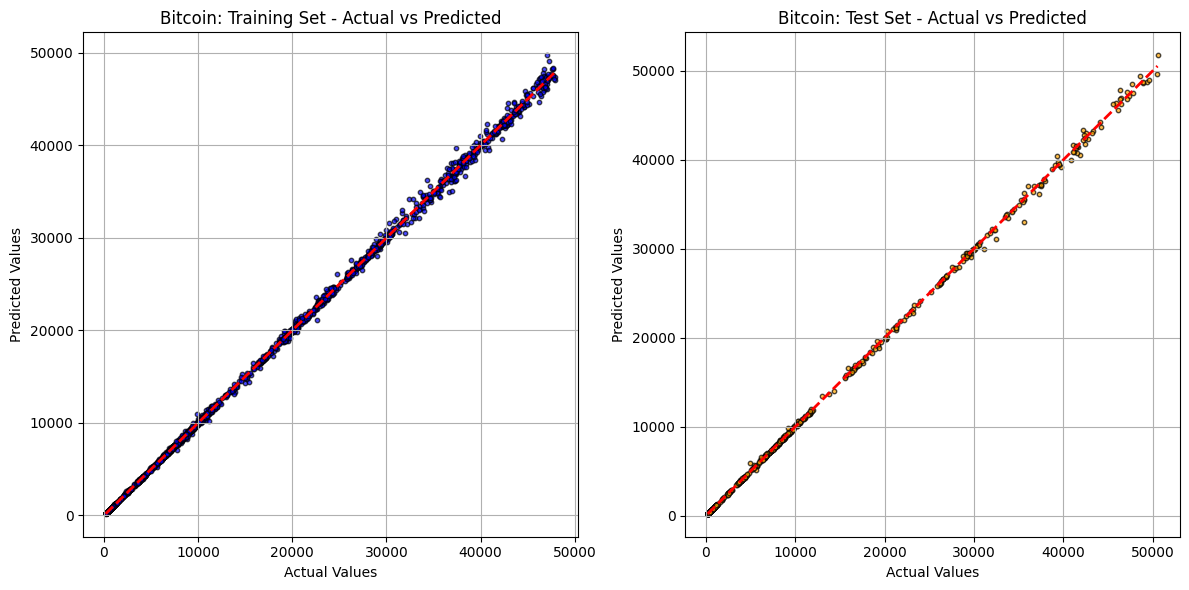

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Training Set - Bitcoin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_bitcoin, y_train_pred_bitcoin, color='blue', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_train_bitcoin.min(), y_train_bitcoin.max()], [y_train_bitcoin.min(), y_train_bitcoin.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bitcoin: Training Set - Actual vs Predicted")
plt.grid(True)

# Scatter plot for Test Set - Bitcoin
plt.subplot(1, 2, 2)
plt.scatter(y_test_bitcoin, y_test_pred_bitcoin, color='orange', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_test_bitcoin.min(), y_test_bitcoin.max()], [y_test_bitcoin.min(), y_test_bitcoin.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bitcoin: Test Set - Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()


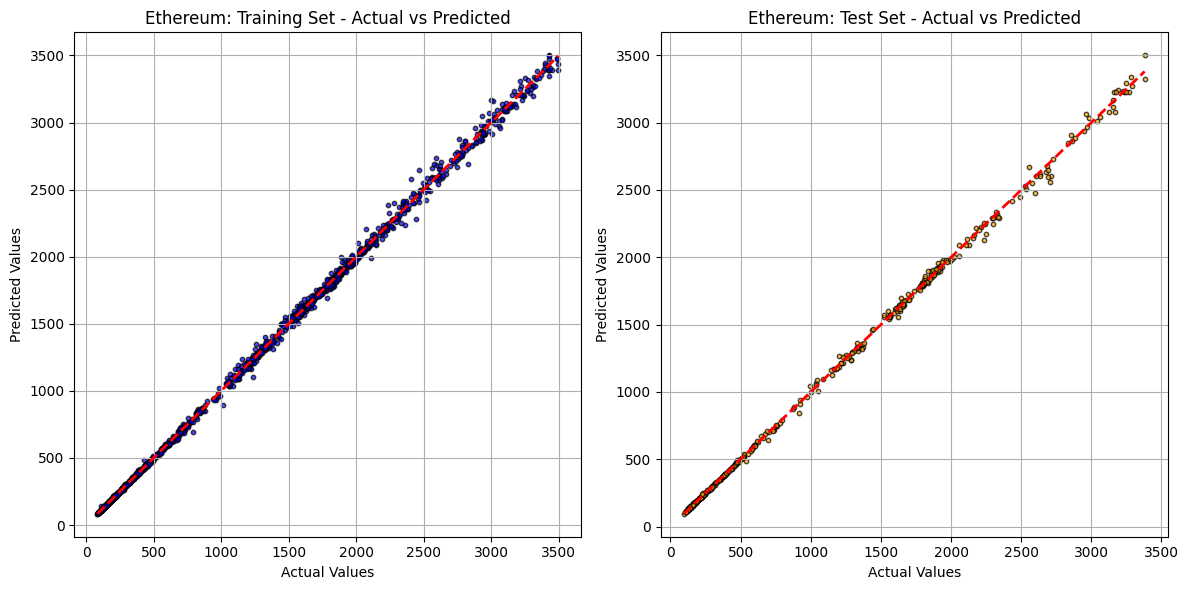

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Training Set - Ethereum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_ethereum, y_train_pred_ethereum, color='blue', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_train_ethereum.min(), y_train_ethereum.max()], [y_train_ethereum.min(), y_train_ethereum.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ethereum: Training Set - Actual vs Predicted")
plt.grid(True)

# Scatter plot for Test Set - Ethereum
plt.subplot(1, 2, 2)
plt.scatter(y_test_ethereum, y_test_pred_ethereum, color='orange', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_test_ethereum.min(), y_test_ethereum.max()], [y_test_ethereum.min(), y_test_ethereum.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ethereum: Test Set - Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()


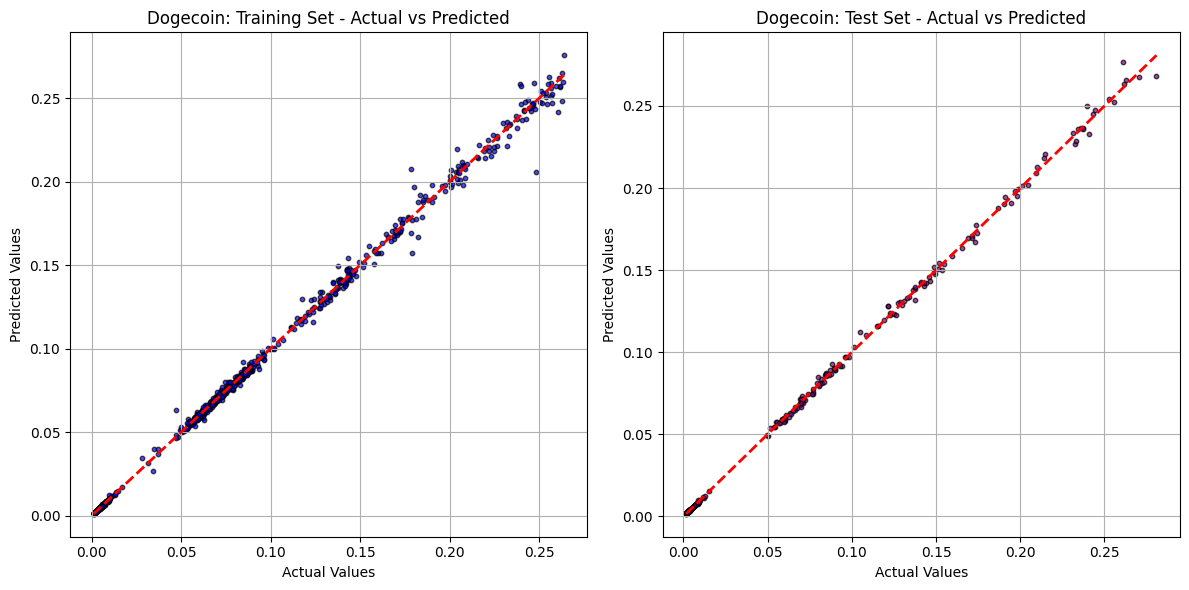

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Training Set - Dogecoin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_dogecoin, y_train_pred_dogecoin, color='blue', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_train_dogecoin.min(), y_train_dogecoin.max()], [y_train_dogecoin.min(), y_train_dogecoin.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Dogecoin: Training Set - Actual vs Predicted")
plt.grid(True)

# Scatter plot for Test Set - Dogecoin
plt.subplot(1, 2, 2)
plt.scatter(y_test_dogecoin, y_test_pred_dogecoin, color='purple', edgecolor='black', alpha=0.7, s=10)
plt.plot([y_test_dogecoin.min(), y_test_dogecoin.max()], [y_test_dogecoin.min(), y_test_dogecoin.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Dogecoin: Test Set - Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()


## Cross-validate Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error

# Create a Linear Regression model
lr_model = LinearRegression()

# Custom scorer for Mean Absolute Error (MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define a function to perform cross-validation for each metric
def evaluate_linear_regression_with_cv(X, y, crypto_name):
    print(f"\nCross-Validation Results for {crypto_name}:\n")

    # R^2 Scores
    r2_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
    print(f"Cross-validated R² scores: {r2_scores}")
    print(f"Average R²: {r2_scores.mean():.4f}")

    # Mean Squared Error (MSE) Scores
    mse_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores
    print(f"Cross-validated MSE scores: {mse_scores}")
    print(f"Average MSE: {mse_scores.mean():.4f}")

    # Mean Absolute Error (MAE) Scores
    mae_scores = cross_val_score(lr_model, X, y, cv=5, scoring=mae_scorer)
    mae_scores = -mae_scores
    print(f"Cross-validated MAE scores: {mae_scores}")
    print(f"Average MAE: {mae_scores.mean():.4f}")

# Perform evaluations for Bitcoin, Ethereum, and Dogecoin
evaluate_linear_regression_with_cv(X_train_bitcoin, y_train_bitcoin, 'Bitcoin')
evaluate_linear_regression_with_cv(X_train_ethereum, y_train_ethereum, 'Ethereum')
evaluate_linear_regression_with_cv(X_train_dogecoin, y_train_dogecoin, 'Dogecoin')



Cross-Validation Results for Bitcoin:

Cross-validated R² scores: [0.99961191 0.99963075 0.99955364 0.99962077 0.99950378]
Average R²: 0.9996
Cross-validated MSE scores: [71118.97773594 70238.72900998 81697.04119597 62023.67031344
 94522.0831689 ]
Average MSE: 75920.1003
Cross-validated MAE scores: [137.44267844 135.074774   127.42667778 116.77693817 144.48187317]
Average MAE: 132.2406

Cross-Validation Results for Ethereum:

Cross-validated R² scores: [0.99943588 0.99910686 0.9991484  0.99927541 0.99932892]
Average R²: 0.9993
Cross-validated MSE scores: [468.63241661 819.92083815 746.90118246 627.76871427 598.69241413]
Average MSE: 652.3831
Cross-validated MAE scores: [12.86490424 15.21376784 14.83754496 13.55981289 13.29351064]
Average MAE: 13.9539

Cross-Validation Results for Dogecoin:

Cross-validated R² scores: [0.99867828 0.99844078 0.99828468 0.9961771  0.9981372 ]
Average R²: 0.9979
Cross-validated MSE scores: [6.25505117e-06 6.88959805e-06 7.79490745e-06 1.33474279e-05
 9.47

## Model 2 - Random Forest

In [ ]:
# importing libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [ ]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_bitcoin, y_train_bitcoin)


RandomForestRegressor(random_state=42)

In [ ]:
def evaluate_random_forest(X_train, y_train, X_test, y_test, crypto_name):
    # Train the model
    rf_model.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = rf_model.predict(X_train)
    # Predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Calculate Mean Squared Error and R-squared for the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate Mean Squared Error and R-squared for the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print evaluation results
    print(f"\nRandom Forest Model Evaluation ({crypto_name}):")

    print(f"Training Set - Mean Squared Error: {train_mse:.6f}")
    print(f"Testing Set  - Mean Squared Error: {test_mse:.6f}")

    print(f"Training Set - R-squared: {train_r2:.6f}")
    print(f"Testing Set  - R-squared: {test_r2:.6f}")

# Evaluate for Bitcoin
evaluate_random_forest(X_train_bitcoin, y_train_bitcoin, X_test_bitcoin, y_test_bitcoin, 'Bitcoin')

# Evaluate for Ethereum
evaluate_random_forest(X_train_ethereum, y_train_ethereum, X_test_ethereum, y_test_ethereum, 'Ethereum')

# Evaluate for Dogecoin
evaluate_random_forest(X_train_dogecoin, y_train_dogecoin, X_test_dogecoin, y_test_dogecoin, 'Dogecoin')



Random Forest Model Evaluation (Bitcoin):
Training Set - Mean Squared Error: 17641.003578
Testing Set  - Mean Squared Error: 114341.880177
Training Set - R-squared: 0.999903
Testing Set  - R-squared: 0.999374

Random Forest Model Evaluation (Ethereum):
Training Set - Mean Squared Error: 181.789742
Testing Set  - Mean Squared Error: 1214.744916
Training Set - R-squared: 0.999793
Testing Set  - R-squared: 0.998577

Random Forest Model Evaluation (Dogecoin):
Training Set - Mean Squared Error: 0.000002
Testing Set  - Mean Squared Error: 0.000009
Training Set - R-squared: 0.999647
Testing Set  - R-squared: 0.998328


## Cross-validate Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

rf_cv = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)

cv_results_bitcoin = cross_validate(rf_cv, X_train_bitcoin, y_train_bitcoin, scoring='r2', cv=5, return_train_score=True)

print("Cross-validation R² scores (test set):", cv_results_bitcoin['test_score'])
print("Average R² score (test set):", cv_results_bitcoin['test_score'].mean())

rf_cv.fit(X_train_bitcoin, y_train_bitcoin)

train_r2 = rf_cv.score(X_train_bitcoin, y_train_bitcoin)
print("R² score on training data:", train_r2)

test_r2 = rf_cv.score(X_test_bitcoin, y_test_bitcoin)
print("R² score on test data:", test_r2)


Cross-validation R² scores (test set): [0.99889572 0.9988255  0.99856093 0.99882868 0.99906566]
Average R² score (test set): 0.998835300182742
R² score on training data: 0.9992219133593063
R² score on test data: 0.9988589555642257


#Discussion


The evaluation of the Random Forest Regressor and Linear Regression models for Bitcoin, Ethereum, and Dogecoin shows how well these algorithms predict cryptocurrency prices.

Random Forest Model:
Bitcoin: The Random Forest model has an MSE of 114,341.88 and an R² of 0.9994, meaning it explains 99.94% of Bitcoin's price variance. Cross-validation results show even lower MSE and a higher R² of 0.9996, indicating excellent performance.
Ethereum: The model has an MSE of 1,214.74 and an R² of 0.9986, showing good performance but slightly less accuracy than Bitcoin. Cross-validation results show an average MSE of 652.38 and R² of 0.9993.
Dogecoin: With an almost negligible MSE of 8.54e-06 and an R² of 0.9983, the model performs almost perfectly, though cross-validation suggests it may be overly optimistic.
Linear Regression Model:
Bitcoin: The Linear Regression model has a higher MSE of 74,998.69 but an R² of 0.9997, showing strong performance but less effective at capturing price fluctuations compared to Random Forest.
Ethereum: The Linear Regression model has an MSE of 639.62, lower than Random Forest's, but its R² of 0.9993 still shows strong predictions. However, Random Forest still performs better in capturing trends.
Dogecoin: The MSE and R² for Dogecoin are low, but Random Forest still slightly outperforms Linear Regression.

#Conclusion

The Random Forest Regressor consistently outperforms Linear Regression in terms of Mean Squared Error and R-squared across all cryptocurrencies. The Random Forest model provides more accurate predictions and handles the complex, non-linear relationships in the data better than Linear Regression. Although Linear Regression offers simplicity and slightly faster computation, Random Forest is the preferred model for better predictive accuracy in this case. Therefore, Random Forest is recommended for predicting cryptocurrency prices in this scenario.